<a href="https://colab.research.google.com/github/faisal-iut/household-pulse/blob/master/education_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill
import pickle
import re
import itertools
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import statsmodels
print(statsmodels.__version__)
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')

0.11.1


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 2.1MB 16.4MB/s 
     |████████████████████████████████| 8.7MB 55.3MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
edu = {}
path =  '/content/drive/My Drive/Colab Notebooks/education data/'
w_s = 1
w_e = 10
t_s = 1
t_e = 5

In [ ]:
##loading excel files into dataframe
for i in range(w_s,w_e):
  edu[i] = {}
  for j in range(t_s,t_e):
    filename = path+'educ'+str(j)+'_week'+str(i)+'.xlsx'
    edu[i][j] = pd.ExcelFile(filename)
    print(filename+' done')

##parsing excel files by sheet names (US+states+metropoliton areas) and loading into dictionary of dataframe
sheets =  edu[1][1].sheet_names
for i in range(w_s,w_e):
  for j in range(1,5):
    sheet_parse = edu[i][j]
    edu[i][j] = {}
    for sheet in sheets:
      edu[i][j][sheet] =sheet_parse.parse(sheet) 

##saving data
edufile =  path+'education_data.pickle'
with open(edufile, 'wb') as handle:
    pickle.dump(edu, handle)

/content/drive/My Drive/Colab Notebooks/education data/educ1_week1.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ2_week1.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ3_week1.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ4_week1.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ1_week2.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ2_week2.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ3_week2.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ4_week2.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ1_week3.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ2_week3.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ3_week3.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ4_week3.xlsx done
/content/drive/My Drive/Colab Notebooks/education data/educ1_week4.xlsx done

In [ ]:
edu = {}

##loading data
edufile = path+'education_data.pickle'
with open(edufile, 'rb') as handle:
    edu = pickle.load(handle)

def modified_ind(df):
  char_list = list(df.iloc[:,0])
  modi_dict = []
  for char in char_list:
    if char =='Total':
      modi_dict.append('Total')
    elif re.match(r'\s', str(char)) is None:
      start = str(char)
      modi_dict.append(None)
    else:
      modi_char = start.strip()+'_'+char.strip()
      modi_dict.append(modi_char)
  return modi_dict

def pre_process_df(df,type):
  df = df.dropna(axis='index', how='all')
  df = df.dropna(axis='columns', how='all')
  df = df.fillna("")
  df = df.T
  df[2] = df[2].str.cat(df[3], sep=' - ')
  df =df.drop(columns=[3])
  if type==2:
    df[2] = df[2].str.cat(df[4], sep=' - ')
    df =df.drop(columns=[4])
  df= df.T
  df.reset_index(drop=True,inplace=True)
  df.columns = df.iloc[0]
  df = df.drop(df.index[0])
  df = df.set_index(df.columns[0])
  return df




def create_col_names(df):
  i_list = list(df.index)
  c_list = list(df.columns)
  ic_list = list(map(' ##FEATURE## '.join, itertools.chain(itertools.product(i_list, c_list))))
  return ic_list

def disc_col(df,md):
  ext_c = list(set(df.columns).difference(set(md.columns)))
  df = df.drop(columns=ext_c)
  return df


##making 1 dataframe all 67(US+states+metropoliton) sheets for each type and for each week
f_df={}
for i in range(t_s+2, 4):
  f_df[i]={}
  for j in range(w_s,2):
    rows = []
    locs = []
    for key,val in edu[j][i].items():
      if key=='US':
        df = edu[j][i][key]
        modi_dict = modified_ind(df)
        col_to_replace = df.columns[0]
        df[col_to_replace] = modi_dict
        df = pre_process_df(df,i)
        if j>1:
          df = disc_col(df,md)
        md = df
        rows.append(df.values.flatten())
        locs.append(key)
        # print("type#",i," week#",j," loc#",key," shape#",df.shape,"-----done.")
      ic_list = create_col_names(df)
      df_new = pd.DataFrame.from_records(rows, columns=ic_list, index = locs)
      f_df[i][j]=df_new
    print("final shape#",f_df[i][j].shape)
len(set(df_new.columns))

final shape# (1, 676)


676

228

In [ ]:
edu = {}

##loading data
edufile = path+'education_data.pickle'
with open(edufile, 'rb') as handle:
    edu = pickle.load(handle)

def modified_ind(df):
  char_list = list(df.iloc[:,0])
  modi_dict = []
  for char in char_list:
    if char =='Total':
      modi_dict.append('Total')
    elif re.match(r'\s', str(char)) is None:
      start = str(char)
      modi_dict.append(None)
    else:
      modi_char = start.strip()+'_'+char.strip()
      modi_dict.append(modi_char)
  return modi_dict

def pre_process_df(df,type):
  df = df.dropna(axis='index', how='all')
  df = df.dropna(axis='columns', how='all')
  df = df.fillna("")
  df = df.T
  df[2] = df[2].str.cat(df[3], sep=' - ')
  df =df.drop(columns=[3])
  if type==2:
    df[2] = df[2].str.cat(df[4], sep=' - ')
    df =df.drop(columns=[4])
  df= df.T
  df.reset_index(drop=True,inplace=True)
  df.columns = df.iloc[0]
  df = df.drop(df.index[0])
  df = df.set_index(df.columns[0])
  return df

def create_col_names(df):
  i_list = list(df.index)
  # print(i_list)
  c_list = list(df.columns)
  # print(c_list)
  ic_list = list(map(' ##FEATURE## '.join, itertools.chain(itertools.product(i_list, c_list))))
  return ic_list

def disc_col(df,md):
  ext_c = list(set(df.columns).difference(set(md.columns)))
  df = df.drop(columns=ext_c)
  return df


##making 1 dataframe all 67(US+states+metropoliton) sheets for each type and for each week
f_df={}
for i in range(t_s, t_e):
  f_df[i]={}
  for j in range(w_s,w_e):
    rows = []
    locs = []
    for key,val in edu[j][i].items():
      df = edu[j][i][key]
      modi_dict = modified_ind(df)
      col_to_replace = df.columns[0]
      df[col_to_replace] = modi_dict
      df = pre_process_df(df,i)
      if j>1:
        df = disc_col(df,md)
      md = df
      rows.append(df.values.flatten())
      locs.append(key)
      print("type#",i," week#",j," loc#",key," shape#",df.shape,"-----done.")
    ic_list = create_col_names(df)
    df_new = pd.DataFrame.from_records(rows, columns=ic_list, index = locs)
    f_df[i][j]=df_new
    print("final shape#",f_df[i][j].shape)

##saving data
f_weeklyfile =  path+'f_weekly_data.pickle'
with open(f_weeklyfile, 'wb') as handle:
    pickle.dump(f_df, handle)

type# 1  week# 1  loc# US  shape# (44, 6) -----done.
type# 1  week# 1  loc# AL  shape# (44, 6) -----done.
type# 1  week# 1  loc# AK  shape# (44, 6) -----done.
type# 1  week# 1  loc# AZ  shape# (44, 6) -----done.
type# 1  week# 1  loc# AR  shape# (44, 6) -----done.
type# 1  week# 1  loc# CA  shape# (44, 6) -----done.
type# 1  week# 1  loc# CO  shape# (44, 6) -----done.
type# 1  week# 1  loc# CT  shape# (44, 6) -----done.
type# 1  week# 1  loc# DE  shape# (44, 6) -----done.
type# 1  week# 1  loc# DC  shape# (44, 6) -----done.
type# 1  week# 1  loc# FL  shape# (44, 6) -----done.
type# 1  week# 1  loc# GA  shape# (44, 6) -----done.
type# 1  week# 1  loc# HI  shape# (44, 6) -----done.
type# 1  week# 1  loc# ID  shape# (44, 6) -----done.
type# 1  week# 1  loc# IL  shape# (44, 6) -----done.
type# 1  week# 1  loc# IN  shape# (44, 6) -----done.
type# 1  week# 1  loc# IA  shape# (44, 6) -----done.
type# 1  week# 1  loc# KS  shape# (44, 6) -----done.
type# 1  week# 1  loc# KY  shape# (44, 6) ----

In [ ]:
##loading data
f_weeklyfile =  path+'f_weekly_data.pickle'
with open(f_weeklyfile, 'rb') as handle:
    f_df = pickle.load(handle)

##making merged datafram from each types for each week
f_combine_t = {}
for i in range(w_s,w_e):
  f_combine_t[i]= f_df[1][i]
  for j in range(t_s+1,t_e):
    f_combine_t[i] = pd.concat([f_combine_t[i], f_df[j][i]], axis=1, join="inner")
    print(f_df[j][i].shape)
  print(f_combine_t[i].shape)

##saving data
f_combine_tfile =  path+'f_combine_t_data.pickle'
with open(f_combine_tfile, 'wb') as handle:
    pickle.dump(f_combine_t, handle)

(67, 322)
(67, 676)
(67, 396)
(67, 1658)
(67, 322)
(67, 676)
(67, 396)
(67, 1658)
(67, 322)
(67, 676)
(67, 396)
(67, 1658)
(67, 322)
(67, 676)
(67, 396)
(67, 1658)
(67, 322)
(67, 676)
(67, 396)
(67, 1658)
(67, 322)
(67, 676)
(67, 396)
(67, 1658)
(67, 322)
(67, 676)
(67, 396)
(67, 1658)
(67, 322)
(67, 676)
(67, 396)
(67, 1658)
(67, 322)
(67, 676)
(67, 396)
(67, 1658)


###HANDLING MISSING VALUES

In [ ]:
##Loading data
f_combine_tfile =  path+'f_combine_t_data.pickle'
with open(f_combine_tfile, 'rb') as handle:
    f_combine_t = pickle.load( handle)

for i in range(w_s, w_e):
  df = f_combine_t[i]
  df = df.replace('-', 0)
  df = df.apply(lambda x: x.replace(-1,0),axis=0)
  df = df.replace([-1,0], 0)
  df = df.replace([np.inf, -np.inf], np.nan)
  df = df.fillna(0)
  f_combine_t[i] = df

##saving data
f_combine_tfile =  path+'f_combine_t_data_no_miss.pickle'
with open(f_combine_tfile, 'wb') as handle:
    pickle.dump(f_combine_t, handle)

### Combining all data into one frame

In [ ]:
##Loading data
f_combine_nmiss_f =  path+'f_combine_t_data_no_miss.pickle'
with open(f_combine_nmiss_f, 'rb') as handle:
    f_combine_nmiss = pickle.load( handle)

edu_all_c = f_combine_nmiss[1]
for i in range(w_s+1,w_e):
  edu_all_c = edu_all_c.append(f_combine_nmiss[i])

##saving data
edu_all_cfile =  path+'edu_all_combine.pickle'
with open(edu_all_cfile, 'wb') as handle:
    pickle.dump(edu_all_c, handle)

### Working with type 3 tables

#### Normalize and discard columns(total, not reported) for edu_3 file

In [ ]:
##Loading data
edu_all_cfile =  path+'edu_all_combine.pickle'
with open(edu_all_cfile, 'rb') as handle:
    edu_ac = pickle.load(handle)

def normalize_to_f(df):
  disc = '- Did not report'
  cols =  list(df.columns)
  col_t_disc = [s for s in cols if disc in s]
  # df = df.drop(columns=col_t_disc)

  count = 0
  prev_ld = 0
  stp = 0
  start = 1
  for ctd in col_t_disc:
    lc_cd = df.columns.get_loc(ctd)
    tot =  df.iloc[:,stp]
    dr = df.iloc[:, lc_cd]
    tot = tot-dr
    to_div = df.iloc[:, start:lc_cd]
    df.iloc[:, start:lc_cd] = to_div.div(tot.values,axis=0)
    # print(stp,lc_cd, start)
    if count%2!=0:
      stp = lc_cd+1
      start = lc_cd+2
    else:
      start = lc_cd+1
    count= count+1
  return df

def discard_total_not_report(df):
  disc = '- Did not report'
  cols =  list(df.columns)
  col_t_disc = [s for s in cols if disc in s]
  count = 0
  prev_ld = 0
  stp = 0
  start = 1
  col_t_disc_2 = []
  for ctd in col_t_disc:
    lc_cd = df.columns.get_loc(ctd)
    if count%2!=0:
      col_t_disc_2.append(lc_cd)
      col_t_disc_2.append(stp)
      stp = lc_cd+1
      start = lc_cd+2
    else:
      col_t_disc_2.append(lc_cd)
      start = lc_cd+1
    count= count+1
  df = df.drop(df.columns[col_t_disc_2], axis = 1)
  return df

def drop_extra_col(df):
    disc = 'Did not report'
    cols =  list(df.columns)
    col_t_disc = [s for s in cols if disc in s]
    df = df.drop(columns=col_t_disc)
    return df

edu_3 = edu_ac.iloc[:,586:1262]
edu_3 = normalize_to_f(edu_3)
edu_3 = discard_total_not_report(edu_3)
edu_3 = drop_extra_col(edu_3)
edu_3 = edu_3.replace([np.inf, -np.inf], np.nan)
edu_3 = edu_3.fillna(1)

##saving data
edu_3_pfile =  path+'edu_3_processed_to_f.pickle'
with open(edu_3_pfile, 'wb') as handle:
    pickle.dump(edu_3, handle)

NameError: ignored

In [ ]:
edu_3.head(10)

,Total ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet usually available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet never available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet usually available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet never available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet usually available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet never available for educational purposes,Age_40 - 54 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes,Age_40 - 54 ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes,Age_40 - 5

In [ ]:
##Loading data
edu_3_pfile =  path+'edu_3_processed_to_f.pickle'
with open(edu_3_pfile, 'rb') as handle:
    edu_3 = pickle.load(handle)
edu_3 = edu_3[:-67]

def calc_forecast(x):
  # Fit your model
  model = pm.auto_arima(x)
  pred = model.predict(1)
  return pred

indexs = list(edu_3.index.unique())
cols = list(edu_3.columns)
indexs = indexs
nd=[]  
temp_s = {}
for s in indexs:
  v = edu_3.apply(lambda x: calc_forecast(x[s]),axis=0)
  # ceiled = np.ceil(v.values[0])
  # ints =  ceiled.astype(int)
  nd.append(v.values[0])
  temp_s[s] = v.values[0]
  #saving data
  t_file =  path+str(s)+'-t_f_week9.pickle'
  with open(t_file, 'wb') as handle:
      pickle.dump(temp_s[s], handle)
  print(s)

edu3_forecast = pd.DataFrame(data= nd, index = indexs, columns=cols)

#saving data
edu_3_ffile =  path+'edu_3_forecast_week9.pickle'
with open(edu_3_ffile, 'wb') as handle:
    pickle.dump(edu3_forecast, handle)

US
AL
AK
AZ
AR
CA
CO
CT
DE
DC
FL
GA
HI
ID
IL
IN
IA
KS
KY
LA
ME
MD
MA
MI
MN
MS
MO
MT
NE
NV
NH
NJ
NM
NY
NC
ND
OH
OK
OR
PA
RI
SC
SD
TN
TX
UT
VT
VA
WA
WV
WI
WY
Boston_Metro_Area
Atlanta_Metro_Area
Los.Angeles_Metro_Area
Phoenix_Metro_Area
New.York_Metro_Area
San.Francisco_Metro_Area
Chicago_Metro_Area
Dallas_Metro_Area
Riverside_Metro_Area
Detroit_Metro_Area
Houston_Metro_Area
Washington.DC_Metro_Area
Philadelphia_Metro_Area
Seattle_Metro_Area
Miami_Metro_Area


In [ ]:
##Loading data
edu_3_pfile =  path+'edu_3_processed_to_f.pickle'
with open(edu_3_pfile, 'rb') as handle:
    edu_3 = pickle.load(handle)

indexs = list(edu_3.index.unique())
cols = list(edu_3.columns)

nd = []
for s in indexs:
  forecast_file =  path+str(s)+'-t_f_week9.pickle'
  with open(forecast_file, 'rb') as handle:
    f = pickle.load(handle)
    nd.append(f)

edu3_forecast = pd.DataFrame(data= nd, index = indexs, columns=cols)

#saving data
# edu_3_ffile =  path+'edu_3_forecast.pickle'
# with open(edu_3_ffile, 'wb') as handle:
#     pickle.dump(edu3_forecast, handle)

In [ ]:
test = edu_3[536:]
# pred = edu_3[536-67:536]
pred = edu3_forecast
print(test.shape, pred.shape)

from sklearn.metrics import mean_squared_error 
# realVals = df.x
# predictedVals = df.p
# mse = mean_squared_error(realVals, predictedVals)
# If you want the root mean squared error
# rmse = mean_squared_error(realVals, predictedVals, squared = False)

def calculate_rmse(test,pred, c):
  realVals = test[c]
  predictedVals = pred[c]
  rmse = mean_squared_error(realVals, predictedVals, squared = False)
  return rmse

rmse_sc = {}
for c in (test.columns):
  rmse = calculate_rmse(test,pred,c)
  rmse_sc[c] = rmse

rmdf = pd.DataFrame(rmse_sc.items(), columns=['feature', 'RMSE'])

(67, 450) (67, 450)


In [ ]:
rmdf
rmdf['C'] = np.arange(len(rmdf))

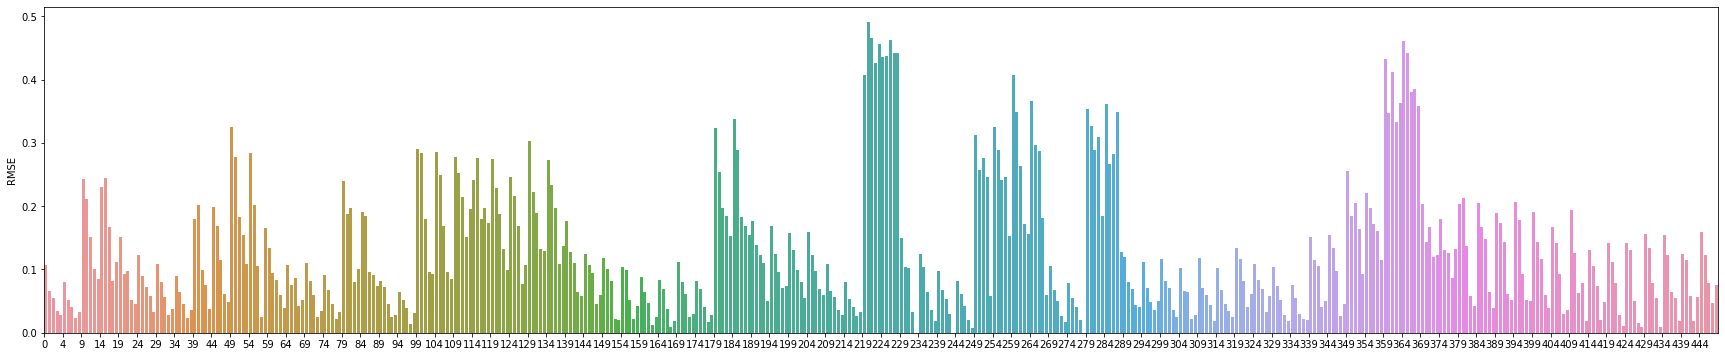

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize = (30,6))  
D=rmdf
ax = sns.barplot(x=D.index, y = "RMSE", data = D)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

In [ ]:
np.arange(0,450,20)

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440])

In [ ]:
##Loading data
edu_3_ffile =  path+'edu_3_forecast.pickle'
with open(edu_3_ffile, 'rb') as handle:
    forecast = pickle.load(handle)

forecast

,Total ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet usually available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet never available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet usually available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet never available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet usually available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet never available for educational purposes,Age_40 - 54 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes,Age_40 - 54 ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes,Age_40 - 5

In [ ]:
##Loading data
edu_3_pfile =  path+'edu_3_processed_to_f.pickle'
with open(edu_3_pfile, 'rb') as handle:
    edu_3 = pickle.load(handle)

df = edu_3.copy()

In [ ]:
edu_3.index

Index(['US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC',
       ...
       'San.Francisco_Metro_Area', 'Chicago_Metro_Area', 'Dallas_Metro_Area',
       'Riverside_Metro_Area', 'Detroit_Metro_Area', 'Houston_Metro_Area',
       'Washington.DC_Metro_Area', 'Philadelphia_Metro_Area',
       'Seattle_Metro_Area', 'Miami_Metro_Area'],
      dtype='object', length=603)

In [ ]:
df = clean_dataset(edu_3)

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(1)

In [ ]:
df.shape

(603, 450)

In [ ]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
edu_3.loc['US',edu_3.columns[0]].values.mean()

62017841.333333336

In [ ]:
st = ["VA","AZ"]
def calc_sum(x):
  return x.sum()
nd=[]  
for s in st:
  v = d.apply(lambda x: calc_sum(x[s]),axis=0)
  nd.append(v.values)
ndd = pd.DataFrame(data= nd, index = ["VA","AZ"])
ndd

In [ ]:



# for i in range(1,10):
df_f = df_us.iloc[:,300]

# Fit your model
model = pm.auto_arima(df_f)
model.predict(1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


array([3644.])

In [ ]:
y_pred = np.array([1,2,3,4,3,4,1,2,3,1,2])
y_truth = np.array([2,2,1,4,1,4,2,2,4,1,2])

for i in range(1,5):
  p=y_pred.copy()
  t=y_truth
  p[t==i]=1
  p[t!=i]=0
  truth = p
  pred=y_pred.copy()
  pred[(truth==1) & (y_pred==i)]=1
  pred[(truth==1) & (y_pred!=i)]=0
  pred[truth!=1]=0
  print("for class",i, truth,pred)

for class 1 [0 0 1 0 1 0 0 0 0 1 0] [0 0 0 0 0 0 0 0 0 1 0]
for class 2 [1 1 0 0 0 0 1 1 0 0 1] [0 1 0 0 0 0 0 1 0 0 1]
for class 3 [0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0]
for class 4 [0 0 0 1 0 1 0 0 1 0 0] [0 0 0 1 0 1 0 0 0 0 0]


In [ ]:
df_f

AZ     5170
AZ      283
AZ      478
AZ     5408
AZ     1701
AZ      160
AZ      559
AZ    15098
AZ     3939
Name: Presence of children under 18 years old_No children ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes, dtype: int64

In [ ]:
##loading data
f_weeklyfile =  path+'f_weekly_data.pickle'
with open(f_weeklyfile, 'rb') as handle:
    f_df = pickle.load(handle)

edu3_c =edu3[1]
for i in range(w_s+1,w_e):
  edu3_c = edu3_c.append(edu3[i])

In [ ]:
edu_ac.loc['US',:]

In [ ]:
edu3_c =edu3[1]
for i in range(w_s+1,w_e):
  edu3_c = edu3_c.append(edu3[i])

In [ ]:
edu3_c.loc['US',:]

,Total ##FEATURE## Total -,Total ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes,Total ##FEATURE## Availability of computer for educational purposes - Did not report,Total ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet usually available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Internet never available for educational purposes,Total ##FEATURE## Availability of Internet for educational purposes - Did not report,Age_18 - 24 ##FEATURE## Total -,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes,Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Did not report,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet usually available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet never available for educational purposes,Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Did not report,Age_25 - 39 ##FEATURE## Total -,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes,Age_25 - 39 ##FEATURE## Availability of computer for educational purposes - Did not report,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet usually available for educational purposes,Age_25 - 39 ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for ed

In [ ]:
edu_3 = f_combine_t[1].iloc[:,586:1262]

In [ ]:
edu_3.shape

(67, 676)

In [ ]:
import json
df={}
df["w1"]={}
df["w2"]={}
print(json.dumps(df, indent=2))

{
  "w1": {},
  "w2": {}
}


In [ ]:
df["w1"]["t1"]={}
df["w1"]["t2"]={}
df["w2"]["t1"]={}
df["w2"]["t2"]={}
print(json.dumps(df, indent=2))

{
  "w1": {
    "t1": {},
    "t2": {}
  },
  "w2": {
    "t1": {},
    "t2": {}
  }
}


In [ ]:
d = pd.DataFrame( [[1, 2],[3, 4]],columns=['internet', 'in class'],index = ["age","race"])

df["w1"]["t1"]["VA"] = d
df["w1"]["t1"]["AZ"] = d+5

df["w2"]["t1"]["VA"] = d
df["w2"]["t1"]["AZ"] = d+1


d = pd.DataFrame( [[1, 2],[3, 4]],columns=['teacher', 'parent'],index = ["age","race"])

df["w1"]["t2"]["VA"] = d+3
df["w1"]["t2"]["AZ"] = d

df["w2"]["t2"]["VA"] = d
df["w2"]["t2"]["AZ"] = d+2

In [ ]:
print("WEEK#1 TYPE#1 VA")
df["w1"]["t1"]["VA"]

WEEK#1 TYPE#1 VA


,internet,in class
age,1,2
race,3,4


In [ ]:
print("WEEK#1 TYPE#2 VA")
df["w1"]["t1"]["VA"]

WEEK#1 TYPE#2 VA


,internet,in class
age,1,2
race,3,4


In [ ]:
print("WEEK#2 TYPE#1 AZ")
df["w1"]["t1"]["AZ"]

WEEK#2 TYPE#1 AZ


,internet,in class
age,6,7
race,8,9


In [ ]:
d = pd.DataFrame( [[1, 2, 3, 4]],columns=
                 ['age feature#internet', 'age feature#in class',
                  'race feature#internet', 'race feature#in class'],index = [0])
df["w1"]["t1"]["VA"] = d
print("WEEK#1 TYPE#1 VA (2D TO 1D TRANSFORMATION)")
df["w1"]["t1"]["VA"]

WEEK#1 TYPE#1 VA (2D TO 1D TRANSFORMATION)


,age feature#internet,age feature#in class,race feature#internet,race feature#in class
0,1,2,3,4


In [ ]:
d = pd.DataFrame( [[6, 7, 8, 9]],columns=
                 ['age feature#internet', 'age feature#in class',
                  'race feature#internet', 'race feature#in class'],index = [0])
df["w1"]["t1"]["AZ"] = d
print("WEEK#1 TYPE#1 AZ (2D TO 1D TRANSFORMATION)")
df["w1"]["t1"]["AZ"]

WEEK#1 TYPE#1 AZ (2D TO 1D TRANSFORMATION)


,age feature#internet,age feature#in class,race feature#internet,race feature#in class
0,6,7,8,9


In [ ]:
d = pd.DataFrame( [[1, 2, 3, 4],[6, 7, 8, 9],[1, 2, 3, 4],[6, 7, 8, 9]],columns=
                 ['age feature#internet', 'age feature#in class',
                  'race feature#internet', 'race feature#in class'],index = ["VA","AZ","VA","AZ"])

# df["w1"]["t1"] = d
# print("WEEK#1 TYPE#1 (ALL LOCATIONS)")
# df["w1"]["t1"]

st = ["VA","AZ"]
def calc_sum(x):
  return x.sum()
nd=[]  
for s in st:
  v = d.apply(lambda x: calc_sum(x[s]),axis=0)
  nd.append(v.values)
ndd = pd.DataFrame(data= nd, index = ["VA","AZ"])
ndd

,0,1,2,3
VA,2,4,6,8
AZ,12,14,16,18


In [ ]:
d

,age feature#internet,age feature#in class,race feature#internet,race feature#in class
VA,1,2,3,4
AZ,6,7,8,9
VA,1,2,3,4
AZ,6,7,8,9


In [ ]:
dd = df["w1"]["t1"]
nd = pd.DataFrame(data=None)

In [ ]:
d = pd.DataFrame( [[4, 5, 6, 7]],columns=
                 ['age feature#parent', 'age feature#teacher',
                  'race feature#parent', 'race feature#teacher'],index = [0])
df["w1"]["t2"]["VA"] = d

d = pd.DataFrame( [[3, 4, 5, 6]],columns=
                 ['age feature#parent', 'age feature#teacher',
                  'race feature#parent', 'race feature#teacher'],index = [0])
df["w1"]["t2"]["AZ"] = d

d = pd.DataFrame( [[4, 5, 6, 7],[3, 4, 5, 6]],columns=
                 ['age feature#parent', 'age feature#teacher',
                  'race feature#parent', 'race feature#teacher'],index = ["VA","AZ"])

df["w1"]["t2"] = d
print("WEEK#1 TYPE#2 (ALL LOCATIONS)")
df["w1"]["t2"]

WEEK#1 TYPE#2 (ALL LOCATIONS)


,age feature#parent,age feature#teacher,race feature#parent,race feature#teacher
VA,4,5,6,7
AZ,3,4,5,6


In [ ]:
df["w1"] = pd.concat([df["w1"]["t1"], df["w1"]["t2"]], axis=1, join="inner")
print("WEEK#1 TYPE#1 TYPE#2 (MERGED) (ALL LOCATIONS)")
df["w1"]

WEEK#1 TYPE#1 TYPE#2 (MERGED) (ALL LOCATIONS)


,age feature#internet,age feature#in class,race feature#internet,race feature#in class,age feature#parent,age feature#teacher,race feature#parent,race feature#teacher
VA,1,2,3,4,4,5,6,7
AZ,6,7,8,9,3,4,5,6


In [ ]:
print("WEEK 1 SHAPE: ",df["w1"].shape)

WEEK 1 SHAPE:  (2, 8)


In [ ]:
edu = {}
edufile = path+'education_data.pickle'
with open(edufile, 'rb') as handle:
    edu = pickle.load(handle)

In [ ]:
df = edu[1][3]['US'].copy()

In [ ]:
char_list = list(df.iloc[:,0])
modi_dict = []
for char in char_list:
  if char =='Total':
    modi_dict.append('Total')
  elif re.match(r'\s', str(char)) is None:
    start = str(char)
    modi_dict.append(None)
  else:
    modi_char = start.strip()+'_'+char.strip()
    modi_dict.append(modi_char)

In [ ]:
col_to_replace = df.columns[0]
df[col_to_replace] = modi_dict

In [ ]:
df

,"Education Table 3. Computer and Internet Availability in Households with Children in Public or Private School, by Select Characteristics: United States",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,Total,Availability of computer for educational purposes,Availability of computer for educational purposes,Availability of computer for educational purposes,Availability of computer for educational purposes,Availability of computer for educational purposes,Availability of computer for educational purposes,Availability of Internet for educational purposes,Availability of Internet for educational purposes,Availability of Internet for educational purposes,Availability of Internet for educational purposes,Availability of Internet for educational purposes,Availability of Internet for educational purposes
3,None,NaN,Device always available for educational purposes,Device usually available for educational purposes,Device sometimes available for educational pur...,Device rarely available for educational purposes,Device never available for educational purposes,Did not report,Internet always available for educational purp...,Internet usually available for educational pur...,Internet sometimes available for educational p...,Internet rarely available for educational purp...,Internet never available for educational purposes,Did not report
4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,"Household income_$100,000 - $149,999",9995679,7760931,1454658,540414,138022,73552,28101,8244838,1438056,157636,86852,62979,5317
66,"Household income_$150,000 - $199,999",4463165,3780918,532437,117153,20618,10300,1738,3939978,422205,74826,16047,10109,-
67,"Household income_$200,000 and above",5200854,4628820,418044,116801,16916,17964,2309,4676458,439120,50093,21686,13495,-
68,Household income_Did not report,3230700,1640561,601883,148992,73465,7715,758083,1491945,397481,75019,32130,10201,1223923


In [ ]:
df = df.dropna(axis='index', how='all')
df = df.dropna(axis='columns', how='all')
df = df.fillna("")
df = df.replace('-', 1)
df = df.T
df[2] = df[2].str.cat(df[3], sep=' - ')
df =df.drop(columns=[3])
# df[2] = df[2].str.cat(df[4], sep=' - ')
# df =df.drop(columns=[4])
df= df.T
df.reset_index(drop=True,inplace=True)
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.set_index(df.columns[0])

In [ ]:
df.index

Index(['Total', 'Age_18 - 24', 'Age_25 - 39', 'Age_40 - 54', 'Age_55 - 64',
       'Age_65 and above', 'Sex_Male', 'Sex_Female',
       'Hispanic origin and Race_Hispanic or Latino (may be of any race)',
       'Hispanic origin and Race_White alone, not Hispanic',
       'Hispanic origin and Race_Black alone, not Hispanic',
       'Hispanic origin and Race_Asian alone, not Hispanic',
       'Hispanic origin and Race_Two or more races + Other races, not Hispanic',
       'Education_Less than high school', 'Education_High school or GED',
       'Education_Some college/associate’s degree',
       'Education_Bachelor’s degree or higher', 'Marital status_Married',
       'Marital status_Widowed', 'Marital status_Divorced/separated',
       'Marital status_Never married', 'Marital status_Did not report',
       'Presence of children under 18 years old_Children in household',
       'Presence of children under 18 years old_No children',
       'Computer provided by… *_Computer, Children’s sch

In [ ]:
disc = 'Did not report'
cols =  list(df.columns)
col_t_disc = [s for s in cols if disc in s]
# df = df.drop(columns=col_t_disc)
st_point = 1
for ctd in col_t_disc:
  lc_cd = df.columns.get_loc(ctd)
  tot =  df.iloc[:,0]
  dr = df.iloc[:, lc_cd]
  tot = tot-dr
  to_div = df.iloc[:, st_point:lc_cd]
  df.iloc[:, st_point:lc_cd] = to_div.div(tot.values,axis=0)
  st_point = lc_cd+1

In [ ]:
df.columns

Index(['Total - ',
       'Availability of computer for educational purposes - Device always available for educational purposes',
       'Availability of computer for educational purposes - Device usually available for educational purposes',
       'Availability of computer for educational purposes - Device sometimes available for educational purposes',
       'Availability of computer for educational purposes - Device rarely available for educational purposes',
       'Availability of computer for educational purposes - Device never available for educational purposes',
       'Availability of computer for educational purposes - Did not report',
       'Availability of Internet for educational purposes - Internet always available for educational purposes',
       'Availability of Internet for educational purposes - Internet usually available for educational purposes',
       'Availability of Internet for educational purposes - Internet sometimes available for educational purposes',
   

In [ ]:
df.head(10)

,Total -,Availability of computer for educational purposes - Device always available for educational purposes,Availability of computer for educational purposes - Device usually available for educational purposes,Availability of computer for educational purposes - Device sometimes available for educational purposes,Availability of computer for educational purposes - Device rarely available for educational purposes,Availability of computer for educational purposes - Device never available for educational purposes,Availability of computer for educational purposes - Did not report,Availability of Internet for educational purposes - Internet always available for educational purposes,Availability of Internet for educational purposes - Internet usually available for educational purposes,Availability of Internet for educational purposes - Internet sometimes available for educational purposes,Availability of Internet for educational purposes - Internet rarely available for educational purposes,Availability of Internet for educational purposes - Internet never available for educational purposes,Availability of Internet for educational purposes - Did not report
-,,,,,,,,,,,,,
Total,66561640,46713712,11020451,4887743,1987773,1096152,855810,48326505,11133943,3308815,1411485,1034373,1346519
Age_18 - 24,3091963,1951410,627894,294423,91231,61351,65655,2010816,652620,126887,118577,39744,143318
Age_25 - 39,26509961,16846599,4896617,2684805,1300220,489931,291788,18412158,4550103,1808068,882815,360504,496313
Age_40 - 54,28495279,21498471,4079192,1634317,446753,376310,460235,21696677,4570716,1069885,256397,259680,641924
Age_55 - 64,5828964,4431737,981649,180275,115487,97592,22225,4239583,946953,176810,136995,298061,30562
Age_65 and above,2635474,1985494,435099,93923,34082,70968,15907,1967271,413551,127165,16702,76383,34402
Sex_Male,30384782,22366368,4910820,1740415,557494,353514,456171,23021080,4959682,940803,420365,336359,706493
Sex_Female,36176859,24347344,6109631,3147328,1430278,742638,399639,25305425,6174261,2368012,991120,698014,640027
Hispanic origin and Race_Hispanic or Latino (may be of any race),15022220,10248507,2297257,1461903,432060,280526,301967,10395118,2756917,750808,327675,348899,442803


In [ ]:
df.iloc[0,:]

0
Total -                                                                                                      66561640
Availability of computer for educational purposes - Device always available for educational purposes         46713712
Availability of computer for educational purposes - Device usually available for educational purposes        11020451
Availability of computer for educational purposes - Device sometimes available for educational purposes       4887743
Availability of computer for educational purposes - Device rarely available for educational purposes          1987773
Availability of computer for educational purposes - Device never available for educational purposes           1096152
Availability of computer for educational purposes - Did not report                                             855810
Availability of Internet for educational purposes - Internet always available for educational purposes       48326505
Availability of Internet for educational purposes - In

In [ ]:
for i in range(1,2):
  for j in range(w_s,w_e):
    md = edu[w_s][i]['US']
    for key,val in edu[j][i].items():
      df = edu[j][i][key]
      md_c = set(md.columns)
      df_c = set(df.columns)
      ext_c = list(df_c.difference(md_c))
      if len(ext_c)>0:
        print(ext_c)
      print("week: ",j," type:",i,"shape",df.shape)
    


week:  1  type: 1 shape (59, 7)
['Education Table 1. Time Spent in Last Week on Home Based Education for Households with Children in School, by Select Characteristics: Alabama']
week:  1  type: 1 shape (59, 7)
['Education Table 1. Time Spent in Last Week on Home Based Education for Households with Children in School, by Select Characteristics: Alaska']
week:  1  type: 1 shape (59, 7)
['Education Table 1. Time Spent in Last Week on Home Based Education for Households with Children in School, by Select Characteristics: Arizona']
week:  1  type: 1 shape (59, 7)
['Education Table 1. Time Spent in Last Week on Home Based Education for Households with Children in School, by Select Characteristics: Arkansas']
week:  1  type: 1 shape (59, 7)
['Education Table 1. Time Spent in Last Week on Home Based Education for Households with Children in School, by Select Characteristics: California']
week:  1  type: 1 shape (59, 7)
['Education Table 1. Time Spent in Last Week on Home Based Education for Ho

In [ ]:
f_weeklyfile =  path+'f_weekly_data.pickle'
with open(f_weeklyfile, 'rb') as handle:
    f_df = pickle.load(handle)

for i in range(w_s,w_e):
  for j in range(t_s,t_e):
    print(f_df[j][i].shape)
  print("-----")

(67, 264)
(67, 322)
(67, 676)
(67, 396)
-----
(67, 264)
(67, 322)
(67, 676)
(67, 396)
-----
(67, 264)
(67, 322)
(67, 676)
(67, 396)
-----
(67, 264)
(67, 322)
(67, 676)
(67, 396)
-----
(67, 264)
(67, 322)
(67, 676)
(67, 396)
-----
(67, 264)
(67, 322)
(67, 676)
(67, 396)
-----
(67, 264)
(67, 322)
(67, 676)
(67, 396)
-----
(67, 264)
(67, 322)
(67, 676)
(67, 396)
-----
(67, 264)
(67, 322)
(67, 676)
(67, 396)
-----


In [ ]:
for i in range(w_s,w_e):
  print(f_combine_t[i].shape)

(67, 1658)
(67, 1658)
(67, 1658)
(67, 1658)
(67, 1658)
(67, 1658)
(67, 1658)
(67, 1658)
(67, 1658)


In [ ]:
f_combine_t[2].head(10)

,Total ##FEATURE## Total -,Total ##FEATURE## Children enrolled in public or private school - Total,Total ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all teaching activities with children,Total ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all live virtual contact between students and their teachers,Total ##FEATURE## With only children normally homeschooled -,Total ##FEATURE## Did not report -,Age_18 - 24 ##FEATURE## Total -,Age_18 - 24 ##FEATURE## Children enrolled in public or private school - Total,Age_18 - 24 ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all teaching activities with children,Age_18 - 24 ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all live virtual contact between students and their teachers,Age_18 - 24 ##FEATURE## With only children normally homeschooled -,Age_18 - 24 ##FEATURE## Did not report -,Age_25 - 39 ##FEATURE## Total -,Age_25 - 39 ##FEATURE## Children enrolled in public or private school - Total,Age_25 - 39 ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all teaching activities with children,Age_25 - 39 ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all live virtual contact between students and their teachers,Age_25 - 39 ##FEATURE## With only children normally homeschooled -,Age_25 - 39 ##FEATURE## Did not report -,Age_40 - 54 ##FEATURE## Total -,Age_40 - 54 ##FEATURE## Children enrolled in public or private school - Total,Age_40 - 54 ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all teaching activities with children,Age_40 - 54 ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all live virtual contact between students and their teachers,Age_40 - 54 ##FEATURE## With only children normally homeschooled -,Age_40 - 54 ##FEATURE## Did not report -,Age_55 - 64 ##FEATURE## Total -,Age_55 - 64 ##FEATURE## Children enrolled in public or private school - Total,Age_55 - 64 ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all teaching activities with children,Age_55 - 64 ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all live virtual contact between students and their teachers,Age_55 - 64 ##FEATURE## With only children normally homeschooled -,Age_55 - 64 ##FEATURE## Did not report -,Age_65 and above ##FEATURE## Total -,Age_65 and above ##FEATURE## Children enrolled in public or private school - Total,Age_65 and above ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all teaching activities with children,Age_65 and above ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all live virtual contact between students and their teachers,Age_65 and above ##FEATURE## With only children normally homeschooled -,Age_65 and above ##FEATURE## Did not report -,Sex_Male ##FEATURE## Total -,Sex_Male ##FEATURE## Children enrolled in public or private school - Total,Sex_Male ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all teaching activities with children,Sex_Male ##FEATURE## Children enrolled in public or private school - Average household hours spent in last 7 days on all live virtual contact between students and their teachers,...,"Household income_$75,000 - $99,999 ##FEATURE## Internet available to children for educational purposes * - Paid for by the children’s school or school district","Household income_$75,000 - $99,999 ##FEATURE## Internet ava

In [ ]:
edu[2][i].head(10)

,"Education Table 2. COVID-19 Pandemic Impact on How Children Received Education, by Select Characteristics: United States",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,Source: U.S. Census Bureau Household Pulse Sur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total Population 18 Years and Older in Househo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Select characteristics,Total,Impact of pandemic on children's education *,Impact of pandemic on children's education *,Impact of pandemic on children's education *,Impact of pandemic on children's education *,Impact of pandemic on children's education *,Impact of pandemic on children's education *,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Classes were moved to a distance learning format,Classes were moved to a distance learning format,Where classes were cancelled,Where classes changed in another way,Where no change to classes because schools did...,Did not report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Using online resources,Using paper materials sent home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Total,66561640,47358626,14101938,28826836,2435946,235108,955070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Age,N

In [ ]:
edu[3][i].head(6)

,"Education Table 3. Computer and Internet Availability in Households with Children in Public or Private School, by Select Characteristics: United States",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Source: U.S. Census Bureau Household Pulse Sur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total Population 18 Years and Older in Househo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Select characteristics,Total,Availability of computer for educational purposes,Availability of computer for educational purposes,Availability of computer for educational purposes,Availability of computer for educational purposes,Availability of computer for educational purposes,Availability of computer for educational purposes,Availability of Internet for educational purposes,Availability of Internet for educational purposes,Availability of Internet for educational purposes,Availability of Internet for educational purposes,Availability of Internet for educational purposes,Availability of Internet for educational purposes
3,NaN,NaN,Device always available for educational purposes,Device usually available for educational purposes,Device sometimes available for educational pur...,Device rarely available for educational purposes,Device never available for educational purposes,Did not report,Internet always available for educational purp...,Internet usually available for educational pur...,Internet sometimes available for educational p...,Internet rarely available for educational purp...,Internet never available for educational purposes,Did not report
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Total,66561640,46713712,11020451,4887743,1987773,1096152,855810,48326505,11133943,3308815,1411485,1034373,1346519


In [ ]:
edu[4][i].head(6)

,"Education Table 4. Provider of Computer and Internet Services for Households with Children Enrolled in Public or Private School, by Select Characteristics: United States",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Source: U.S. Census Bureau Household Pulse Sur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total Population 18 Years and Older in Househo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Select characteristics,Total,Computer or digital device available to childr...,Computer or digital device available to childr...,Computer or digital device available to childr...,Computer or digital device available to childr...,Internet available to children for educational...,Internet available to children for educational...,Internet available to children for educational...,Internet available to children for educational...
3,NaN,NaN,Provided by the children’s school or school di...,Provided by someone in the household or family...,Provided by another source,Did not report,Paid for by the children’s school or school di...,Paid for by someone in the household or family,Paid for by another source,Did not report
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Total,66561640,24921595,45512890,1088192,2734951,1100926,61118542,1002227,3812018


In [ ]:
edu1[2]

,"Education Table 1. Time Spent in Last Week on Home Based Education for Households with Children in School, by Select Characteristics: United States",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Source: U.S. Census Bureau Household Pulse Sur...,NaN,NaN,NaN,NaN,NaN,NaN
1,Total Population 18 Years and Older in Househo...,NaN,NaN,NaN,NaN,NaN,NaN
2,Select characteristics,Total,Children enrolled in public or private school,Children enrolled in public or private school,Children enrolled in public or private school,With only children normally homeschooled,Did not report
3,NaN,NaN,Total,Average household hours spent in last 7 days o...,Average household hours spent in last 7 days o...,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Total,70340384,67138021,12.9518,4.23752,3202363,157160002
6,Age,NaN,NaN,NaN,NaN,NaN,NaN
7,18 - 24,2446629,2350446,6.59498,3.32794,96183,6586074
8,25 - 39,29304582,27973754,13.482,3.62175,1330828,37448442
9,40 - 54,30031386,29012056,13.3636,4.8842,1019331,31991373


In [ ]:
by_age = pd.DataFrame()
for i in range(1,9):
  if i ==1:
    by_age = by_age.append(edu1[1].iloc[[2,3]])
    by_age['Week']='week'
  by_age = by_age.append(edu1[i].iloc[np.r_[7:12],:])
  by_age.loc[np.r_[7:12], 'Week'] = i
  by_age.reset_index(drop=True,inplace=True)
by_age.loc[np.r_[7:12], 'Week'] = 2
by_age.fillna("",inplace=True)

In [ ]:
by_age

,"Education Table 1. Time Spent in Last Week on Home Based Education for Households with Children in School, by Select Characteristics: United States",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Week,Unnamed: 7
0,Select characteristics,Total,Children enrolled in public or private school,Children enrolled in public or private school,Children enrolled in public or private school,With only children normally homeschooled,Did not report,week,
1,,,Total,Average household hours spent in last 7 days o...,Average household hours spent in last 7 days o...,,,week,
2,18 - 24,3210238,3091963,10.1292,3.55016,118275,10606184,1,
3,25 - 39,27396383,26509961,13.6845,3.17862,886422,37004823,1,
4,40 - 54,30000131,28495279,13.2415,4.59998,1504851,29604106,1,
5,55 - 64,6063071,5828964,11.134,5.10727,234107,34875905,1,
6,65 and above,2745027,2635474,12.1219,5.15126,109553,45825106,1,
7,18 - 24,2446629,2350446,6.59498,3.32794,96183,6586074,2,
8,25 - 39,29304582,27973754,13.482,3.62175,1330828,37448442,2,
9,40 - 54,30031386,29012056,13.3636,4.8842,1019331,31991373,2,


In [ ]:
by_age = by_age.drop('Unnamed: 7',1)
new_header1 = list(by_age.loc[[0],:].values[0])
new_header2 = list(by_age.loc[[1],:].values[0])
header = ['age', 'total','public/private' ,'all teaching','virtual learning','homeschooled','not reported', 'week']
# header = zip(new_header1, new_header2)
by_age.columns = list(header)
by_age = by_age.iloc[2:]
by_age.reset_index(drop=True,inplace=True)

In [ ]:
by_age

,age,total,public/private,all teaching,virtual learning,homeschooled,not reported,week
0,18 - 24,3210238,3091963,10.1292,3.55016,118275,10606184,1
1,25 - 39,27396383,26509961,13.6845,3.17862,886422,37004823,1
2,40 - 54,30000131,28495279,13.2415,4.59998,1504851,29604106,1
3,55 - 64,6063071,5828964,11.134,5.10727,234107,34875905,1
4,65 and above,2745027,2635474,12.1219,5.15126,109553,45825106,1
5,18 - 24,2446629,2350446,6.59498,3.32794,96183,6586074,2
6,25 - 39,29304582,27973754,13.482,3.62175,1330828,37448442,2
7,40 - 54,30031386,29012056,13.3636,4.8842,1019331,31991373,2
8,55 - 64,6342527,5877452,11.6552,4.30718,465076,35496704,2
9,65 and above,2215259,1924313,9.84955,4.14518,290945,45637410,2


In [ ]:
by_age.loc[:,'age'].values

array(['    18 - 24', '    25 - 39', '    40 - 54', '    55 - 64',
       '    65 and above', '    18 - 24', '    25 - 39', '    40 - 54',
       '    55 - 64', '    65 and above', '    18 - 24', '    25 - 39',
       '    40 - 54', '    55 - 64', '    65 and above', '    18 - 24',
       '    25 - 39', '    40 - 54', '    55 - 64', '    65 and above',
       '    18 - 24', '    25 - 39', '    40 - 54', '    55 - 64',
       '    65 and above', '    18 - 24', '    25 - 39', '    40 - 54',
       '    55 - 64', '    65 and above', '    18 - 24', '    25 - 39',
       '    40 - 54', '    55 - 64', '    65 and above', '    18 - 24',
       '    25 - 39', '    40 - 54', '    55 - 64', '    65 and above'],
      dtype=object)

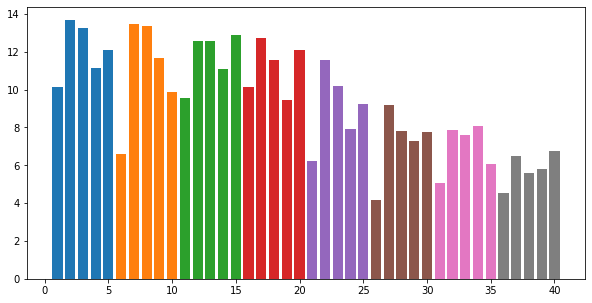

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

for week in range(1,9):
  a_18 = by_age.loc[(by_age['week']==week)]['all teaching'].values
  ld = week+np.arange(4*(week-1),4*(week-1)+5,1)
  plt.bar(ld, a_18)

In [ ]:
np.arange(3)

array([0, 1, 2])

In [ ]:
by_age.fillna("",inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
by_age

,"Education Table 1. Time Spent in Last Week on Home Based Education for Households with Children in School, by Select Characteristics: United States",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
2,Select characteristics,Total,Children enrolled in public or private school,Children enrolled in public or private school,Children enrolled in public or private school,Children enrolled in public or private school,With only children normally homeschooled,Did not report
3,,,Total,Average household hours spent in last 7 days o...,Average household hours spent in last 7 days o...,Average household hours spent in last 7 days b...,,
6,Age,,,,,,,
7,18 - 24,5330535,4915702,4.53611,2.25711,4.28487,414833,15109802
8,25 - 39,23296351,22019456,6.50937,2.2851,5.411,1276894,36350159
9,40 - 54,28858019,27547479,5.60336,2.37962,5.73781,1310540,28751166
10,55 - 64,6251645,5955981,5.81983,2.94999,6.09452,295664,34389790
11,65 and above,3325580,3080869,6.75107,3.01914,5.05826,244711,45158521
